In [10]:
from pathlib import Path
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
JPHACKS_dir = Path('/home/qiushi/workspace/JPHACKS/')
of_outdir = Path('/home/qiushi/workspace/JPHACKS/output/processed/')
of_aligneddir = Path('/home/qiushi/workspace/JPHACKS/output/processed/cLgEcNPr-ZE.mp4_aligned/')
aligned_lm_path = Path('/home/qiushi/workspace/JPHACKS/output/processed2/cLgEcNPr-ZE.mp4_aligned.csv')
cropped_outdir = Path('/home/qiushi/workspace/JPHACKS/output/processed2/cLgEcNPr-ZE.mp4_aligned_aligned_cropped/')
cropped_outdir.mkdir(exist_ok=True)

In [21]:
lm_df = pd.read_csv(aligned_lm_path)
lm_df

,frame,face_id,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,1,0,0.0,0.98,1,0.077917,0.293945,-0.952641,-0.316540,0.281786,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,2,0,0.0,0.98,1,0.077251,0.272675,-0.959000,-0.317211,0.262823,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,3,0,0.0,0.98,1,0.078179,0.285228,-0.955266,-0.303922,0.250068,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,0,0.0,0.98,1,0.082503,0.286471,-0.954530,-0.309884,0.242810,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,5,0,0.0,0.98,1,0.072832,0.289409,-0.954431,-0.322312,0.255926,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8833,8834,0,0.0,0.93,1,0.211204,0.278979,-0.936784,-0.193433,0.300300,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8834,8835,0,0.0,0.88,1,0.156352,0.355814,-0.921385,-0.199006,0.464844,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8835,8836,0,0.0,0.88,1,0.206907,0.507335,-0.836541,-0.249781,0.325380,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8836,8837,0,0.0,0.88,1,0.195739,0.543425,-0.816318,-0.214373,0.394439,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# 口を切り出す

## 口の中央を捉える

唇の点から平均値を算出して中央の位置とする

In [22]:
lip_idexies = list(range(48, 68))

In [23]:
lip_x_list = [' x_{}'.format(i) for i in lip_idexies]
lip_y_list = [' y_{}'.format(i) for i in lip_idexies]

In [25]:
lm_df[' x_lip_mean'] = lm_df[lip_x_list].mean(axis=1)
lm_df[' y_lip_mean'] = lm_df[lip_y_list].mean(axis=1)

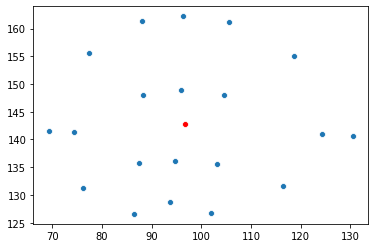

In [26]:
sns.scatterplot(lm_df.iloc[0][lip_x_list].values, lm_df.iloc[0][lip_y_list].values)
sns.scatterplot([lm_df.iloc[0][' x_lip_mean']], [lm_df.iloc[0][' y_lip_mean']], color='red')

## サイズで切り出す


0it [00:00, ?it/s]
79it [00:00, 784.88it/s]
210it [00:00, 891.92it/s]
266it [00:00, 522.59it/s]
395it [00:00, 636.00it/s]
525it [00:00, 750.43it/s]
653it [00:00, 856.02it/s]
779it [00:00, 946.69it/s]
909it [00:00, 1028.96it/s]
1038it [00:01, 1094.59it/s]
1167it [00:01, 1146.38it/s]
1296it [00:01, 1185.37it/s]
1424it [00:01, 1211.39it/s]
1552it [00:01, 1230.54it/s]
1680it [00:01, 1243.49it/s]
1807it [00:01, 1010.95it/s]
1935it [00:01, 1078.82it/s]
2063it [00:01, 1131.05it/s]
2191it [00:01, 1169.54it/s]
2319it [00:02, 1197.96it/s]
2445it [00:02, 1215.46it/s]
2571it [00:02, 1226.64it/s]
2697it [00:02, 1234.35it/s]
2822it [00:02, 1234.25it/s]
2948it [00:02, 1239.33it/s]
3074it [00:02, 1244.74it/s]
3200it [00:02, 1247.58it/s]
3326it [00:02, 1248.46it/s]
3452it [00:03, 1245.81it/s]
3577it [00:03, 1243.35it/s]
3702it [00:03, 964.15it/s] 
3825it [00:03, 1029.80it/s]
3942it [00:03, 1066.72it/s]
4062it [00:03, 1103.27it/s]
4182it [00:03, 1129.55it/s]
4303it [00:03, 1149.98it/s]
4421it [00:03, 1

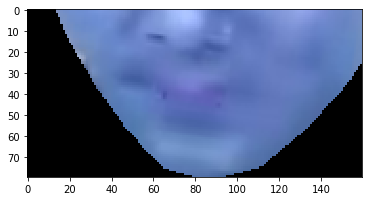

In [27]:
for i, row in tqdm(lm_df.iterrows()):
    frame = i + 1
    aligned_imgpath = of_aligneddir / 'frame_det_00_{:06d}.bmp'.format(frame)
    assert aligned_imgpath.exists()
    
    img = cv2.imread(str(aligned_imgpath))
    x_lip_mean = round(row[' x_lip_mean'])
    y_lip_mean = round(row[' y_lip_mean'])
    
    w = 160
    h = 80
    
    w_size, h_size = img.shape[0], img.shape[1]
    
    crop_img = img[max(0, int(y_lip_mean - h/2)):min(h_size, int(y_lip_mean + h/2)), 
                   max(0, int(x_lip_mean - w/2)):min(w_size, int(x_lip_mean + w/2))]
    plt.imshow(crop_img)
    
    cv2.imwrite(str(cropped_outdir / 'frame_det_00_{:06d}.bmp'.format(frame)), crop_img)
    # plt.imshow(img)
#     break